<a href="https://colab.research.google.com/github/MarkzDG/Codigos_oceano/blob/main/find_peaks_marea/Aplicacion_find_peaks_mareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buscar los picos de la serie de niveles

En este código se usa una función para buscar los picos del registro de niveles horarios del mes de enero 2017 en Ushuaia.

La idea era utilizar esa info para luego calcular la amplitud de las ondas presentes en la serie.


### Cargar los datos

De acuerdo al código base, se cargan los datos del archivo de Ushuaia y se pasa a un dataframe.

In [2]:
import pandas as pd
import xarray as xr
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
ushuaia =xr.open_dataset(r'ushu_ene_2017.nc')
ushu=ushuaia.sea_level.to_dataframe()
ushu.set_index(ushuaia.time.values,inplace=True)
ushu.index=ushu.index.round('H')

--2023-08-20 16:30:38--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23341 (23K) [application/octet-stream]
Saving to: ‘ushu_ene_2017.nc.1’

ushu_ene_2017.nc.1  100%[===================>]  22.79K  --.-KB/s    in 0.002s  

2023-08-20 16:30:38 (11.8 MB/s) - ‘ushu_ene_2017.nc.1’ saved [23341/23341]



### Función para buscar picos

Una de las opciones, que es la que utilizaremos es del paquete [*scipy*](https://https://scipy.org/)*, llamada **[find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)**

In [3]:
from scipy.signal import find_peaks #Cargo la función

Aplico a la columna de nivel del mar

In [4]:
posicion=find_peaks(ushu.sea_level)[0] #--> Notar que la salida de la función findpeaks tiene 2 dimensiones (en la primera tiene el índice de los picos y en la segunda las propiedades si es que se piden)
posicion

array([ 10,  23,  35,  48,  60,  73,  85,  98, 109, 122, 134, 147, 159,
       172, 185, 197, 210, 222, 234, 247, 260, 272, 285, 297, 309, 322,
       335, 346, 359, 371, 384, 396, 409, 421, 434, 446, 459, 471, 483,
       496, 508, 521, 533, 545, 558, 570, 582, 595, 607, 620, 632, 644,
       656, 669, 681, 694, 706, 718, 731])

Usando las posiciones de los picos, genero una variable nueva en donde me quedo con la fehca y el registro de nivel de ese momento

In [5]:
altas=ushu.iloc[posicion]

Hago un grafico como para ir viendo como queda

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

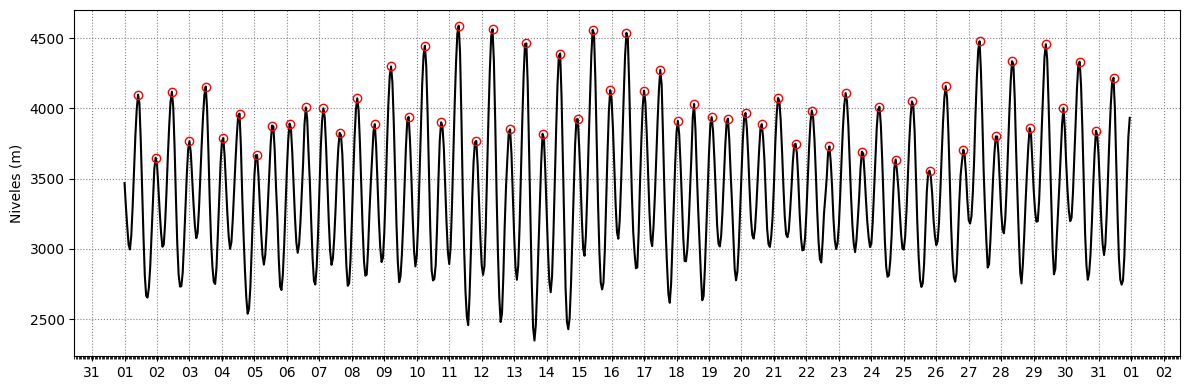

In [7]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(ushu,'k-')
ax.plot(altas,'ro',fillstyle='none')
ax.set(ylabel="Niveles (m)")
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
plt.tight_layout()

Faltaría ahora encontrar los mínimos de la serie.

In [8]:
posicion=find_peaks(-ushu.sea_level)[0]
bajas=ushu.iloc[posicion]

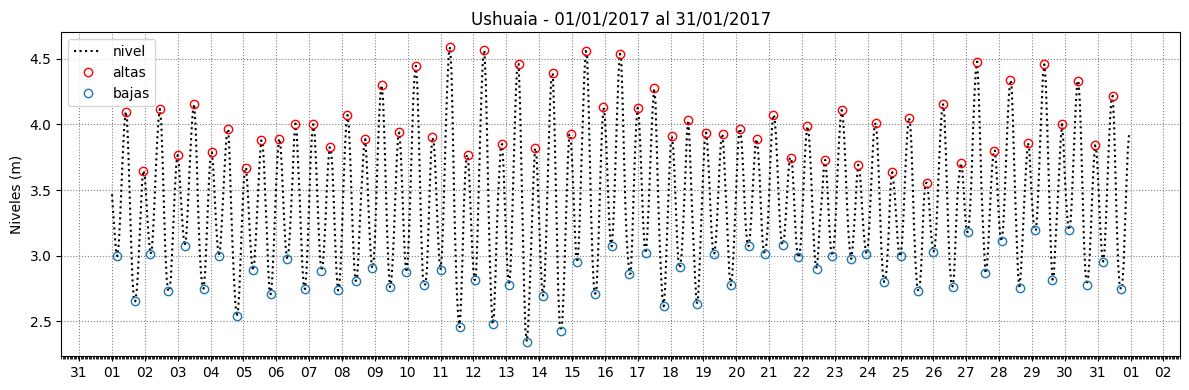

In [9]:
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(ushu/1000,'k:')
ax.plot(altas/1000,'ro',fillstyle='none')
ax.plot(bajas/1000,'o',fillstyle='none')
ax.set(ylabel="Niveles (m)",title='Ushuaia - 01/01/2017 al 31/01/2017')
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['nivel','altas','bajas'])
plt.tight_layout()

Entonces, tenemos hasta aquí dos dataframes con fechas y nivel del mar con los picos máximos y mínimos de la serie de Ushuaia.

Queda pendiente ver cómo se pasaría esto a dato de amplitud.



In [ ]:
altas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-01-01 10:00:00 to 2017-01-31 11:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sea_level  59 non-null     float32
dtypes: float32(1)
memory usage: 708.0 bytes


In [ ]:
bajas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-01 04:00:00 to 2017-01-31 17:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sea_level  60 non-null     float32
dtypes: float32(1)
memory usage: 720.0 bytes


Una opción sería hacer cresta-valle considerando que a cada cresta le corresponde el valle anterior

In [22]:
#Calculo de las amplitudes considerando la distancia valle a cresta
ampli_1=pd.DataFrame(altas.values-bajas.iloc[1::].values)
ampli_1=ampli_1/1000 #--> paso a metros

Otra sería hacer cresta-valle considerando que el valle es el que viene luego de la cresta

In [21]:
ampli_2=pd.DataFrame(altas.values-bajas.iloc[0:-1].values)
ampli_2=ampli_2/1000

[Text(0.5, 0, 'Amplitud (m)')]

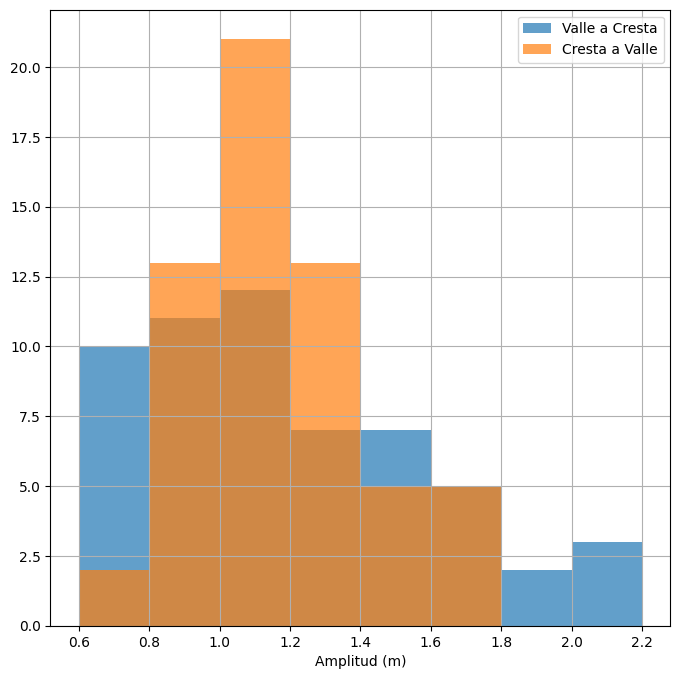

In [14]:
fis,axs=plt.subplots(1,1,figsize=(8,8))
axs.hist(ampli_1.values,bins=[0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2],alpha=0.7)
axs.hist(ampli_2.values, bins=[0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2], alpha=0.7)
axs.grid()
axs.legend(['Valle a Cresta', 'Cresta a Valle'])
axs.set(xlabel='Amplitud (m)')

# Estimando el Periodo
Si lo que quisiera es ver la diferencia temporal entre picos, como para estimar el periodo de las ondas.

In [15]:
 #Lo puedo hacer desde el índice (fechas) del DataFrame que tiene la info de la crestas
 periodos_1=altas.index.to_series().diff().astype('timedelta64[m]') #está en segundos
 #Lo podría hacer directamente desde las posiciones de los máximos que me da la función findpeaks
 posicion=find_peaks(ushu.sea_level)[0] #--> me da las posiciones de cada máximo y yo sé que los datos están cada una hora

In [17]:
import numpy as np
periodos_2=np.diff(posicion)

In [18]:
#Si en lugar de usar una función lo quería hacer más manual
periodos_3=[] #--> defino una variable vacía
for i in range(len(posicion)-1):
  periodos_3.append(posicion[i+1]-posicion[i])
#Otra forma de escribir esto hubiera sido:
periodos_4=[posicion[i+1]-posicion[i] for i in range(len(posicion)-1)]

In [19]:
picos=pd.concat([altas,bajas]).sort_index() # Ordenamos los valores de altas y bajas de a pares

In [20]:
picos.mean()
# Con esto podemos obtener la altura media del mar aproximada

sea_level    3437.470703
dtype: float32